<a href="https://colab.research.google.com/github/Shruti502102/Doc/blob/main/GFG_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64
49
['Female' 'Male']


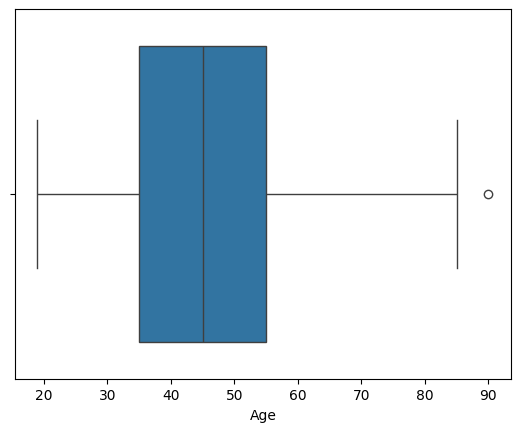

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Difficulty Breathing  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   Blood Pressure        300 non-null    object
 8   Cholesterol Level     300 non-null    object
 9   Outcome Variable      300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB
None


In [10]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean, median, or mode, or drop rows/columns)
# Example: Fill missing values in 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check for inconsistent data (e.g., different spellings of the same value)
# Example: Check for inconsistencies in 'Gender' column
print(df['Gender'].unique())

# Correct inconsistencies if needed
# Example: Replace 'Male' with 'M' and 'Female' with 'F'
df['Gender'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)

# Check for outliers (e.g., using box plots or z-scores)
# Example: Check for outliers in 'Age' using box plot
sns.boxplot(x=df['Age'])
plt.show()

# Handle outliers (e.g., remove them, transform them, or cap them)
# Example: Remove rows where 'Age' is greater than a certain threshold
df = df[df['Age'] < 100]

# Convert data types if needed
# Example: Convert 'Age' to integer type
df['Age'] = df['Age'].astype(int)

# Ensure data consistency and validity
# Example: Check if 'Age' is within a reasonable range (e.g., 0-120)
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

# Print the cleaned dataset info
print(df.info())


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features using Label Encoding
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

# Define features (X) and target variable (y)
X = df.drop('Disease', axis=1)  # Assuming 'Disease' is the target variable
y = df['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (e.g., Random Forest)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.05
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           6       0.25      0.25      0.25         4
           7       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         3
          35       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         1
          40

In [ ]:
# prompt: based on user input it tells output where it ask user about necessary details GIVEN COLUMN

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'model' and 'le' (LabelEncoder) are already defined elsewhere

def get_user_input():
    """Gets user input for features."""
    user_input = {}

    for column in X.columns:
        if column == 'Age':
            while True:
                try:
                    age = int(input("Enter your age: "))
                    if 0 <= age <= 120:
                        user_input[column] = age
                        break
                    else:
                        print("Please enter a valid age between 0 and 120.")
                except ValueError:
                    print("Invalid input. Please enter a number.")

        elif column == 'Gender':
            while True:
                gender = input("Enter your gender (M/F): ").upper()
                if gender in ['Male', 'Female']:
                    user_input[column] = gender
                    break
                else:
                    print("Please enter a valid gender (M/F).")

        elif column.startswith('Symptom'):
            symptom = input(f"Enter your {column.lower()}: ")
            user_input[column] = symptom

    return user_input


def predict_disease(user_input):
    """Predicts the disease based on user input."""
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # Encode categorical features
    for column in input_df.columns:
        if input_df[column].dtype == object:
            input_df[column] = le.transform(input_df[column])

    # Make prediction
    prediction = model.predict(input_df)
    return prediction[0]


# Get user input
user_input = get_user_input()

# Predict disease
predicted_disease = predict_disease(user_input)

# Print the predicted disease
print("Predicted Disease:", predicted_disease)



Enter your age: 18
Enter your gender (M/F): F
Please enter a valid gender (M/F).


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Disease  Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  \
0       56      1      0        1                     1   19       0   
1       24      0      1        1                     0   25       0   
2       37      0      1        1                     0   25       0   
3        6      1      1        0                     1   25       1   
5       37      1      0        0                     0   25       0   

   Blood Pressure  Cholesterol Level  Outcome Variable  
0               1                  2                 1  
1               2                  2                 0  
2               2                  2                 0  
3               2                  2                 1  
5               2                  2                 1  


In [29]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          Disease       Fever       Cough     Fatigue  Difficulty Breathing  \
count  300.000000  300.000000  300.000000  300.000000            300.000000   
mean    55.336667    0.476667    0.466667    0.706667              0.243333   
std     32.661996    0.500290    0.499721    0.456051              0.429812   
min      0.000000    0.000000    0.000000    0.000000              0.000000   
25%     29.750000    0.000000    0.000000    0.000000              0.000000   
50%     56.000000    0.000000    0.000000    1.000000              0.000000   
75%     81.000000    1.000000    1.000000    1.000000              0.000000   
max    115.000000    1.000000    1.000000    1.000000              1.000000   

              Age      Gender  Blood Pressure  Cholesterol Level  \
count  300.000000  300.000000      300.000000         300.000000   
mean    45.756667    0.493333        0.986667           0.966667   
std     12.596548    0.500791        0.971064           0.949682 

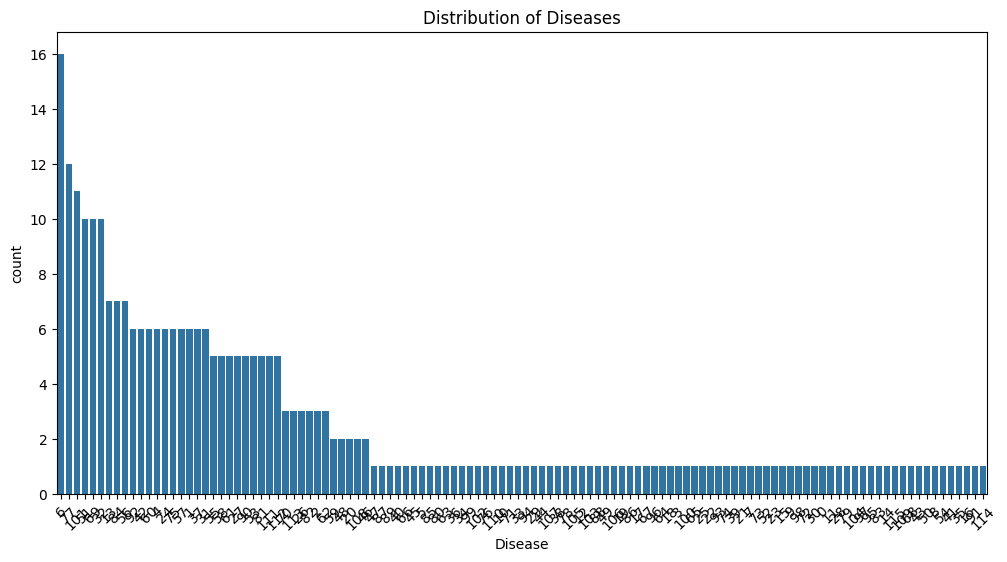

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease', order = df['Disease'].value_counts().index)
plt.title('Distribution of Diseases')
plt.xticks(rotation=45)
plt.show()

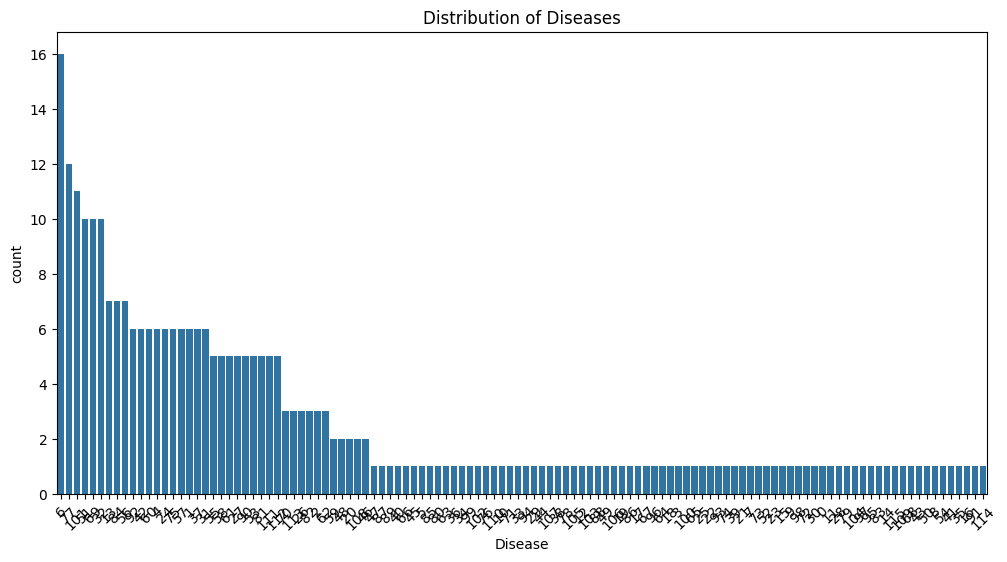

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease', order = df['Disease'].value_counts().index)
plt.title('Distribution of Diseases')
plt.xticks(rotation=45)
plt.show()

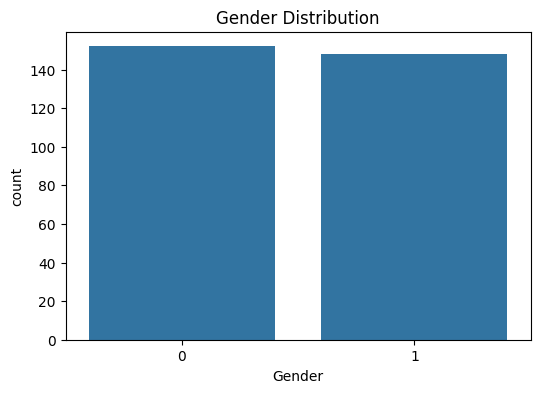

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

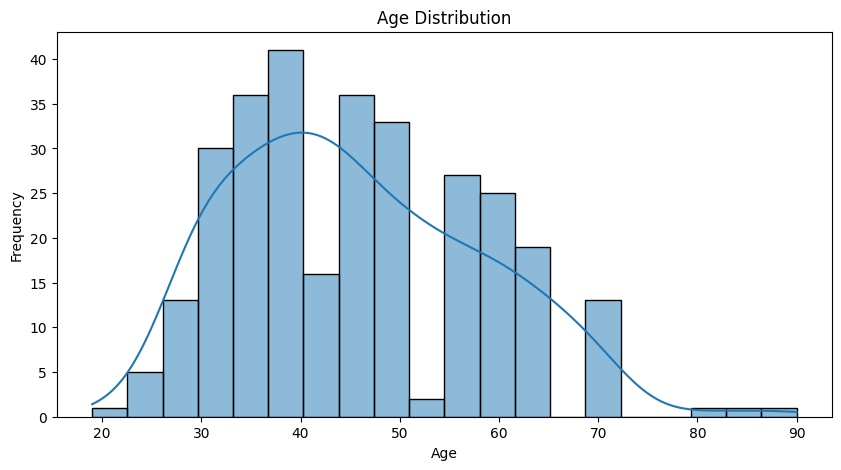

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

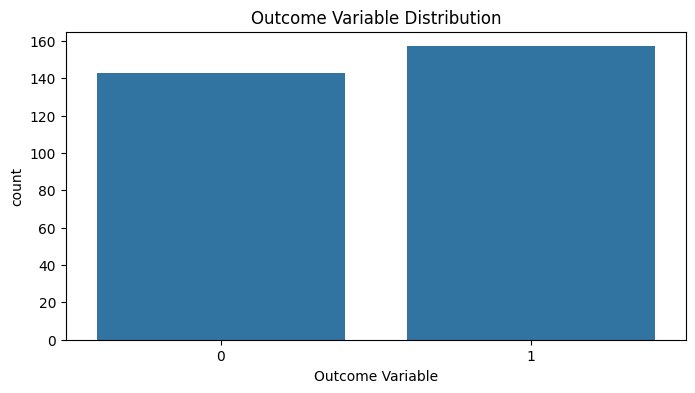

In [22]:

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Outcome Variable')
plt.title('Outcome Variable Distribution')
plt.show()


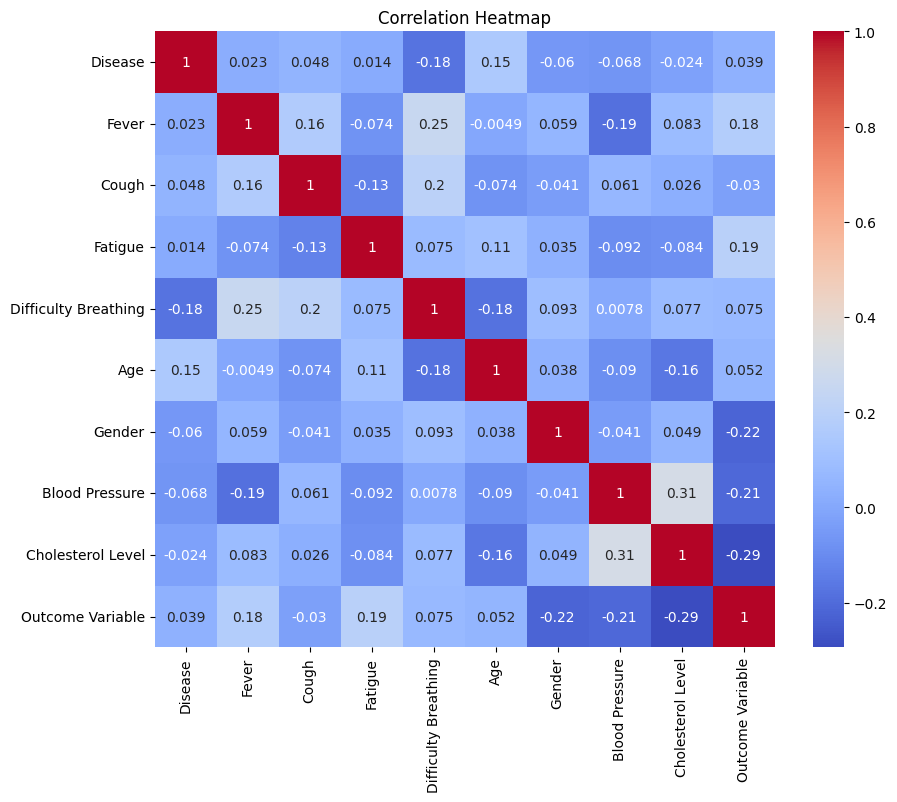

In [21]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()